# Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

In [3]:
def show_images(images,keypoints,number_of_images=15):
    plt.figure(figsize=(12,12))
    if number_of_images == 1:
        plt.imshow(images,cmap='gray')
        for j in range(0,30,2):
            plt.scatter([keypoints[j]],[keypoints[j+1]],s=10)
            plt.axis(False)
    else:
        rows = 1 if number_of_images//5 == 0 else number_of_images//5
        for i in range(number_of_images):
            plt.subplot(rows,5,i+1)
            plt.imshow(images[i],cmap='gray')
            for j in range(0,30,2):
                plt.scatter([keypoints[i,j]],[keypoints[i,j+1]],s=10)
                plt.axis(False)

def show_training_validation_loss_curve(history):
    pd.DataFrame(history.history).iloc[:,:2].plot()

# Loading the Datasets

In [ ]:
train = pd.read_csv('/kaggle/input/facial-keypoints-detection/training.zip')
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
missing_info=train.isna().sum()
missing_info

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

From the above cell, we can see that there are a lot of missing values in the dataset.

We will handle the missing data below

## Extracting the training Images
As the images are in last column of dataset as object dtype, We need to convert these to Numpy Array to visualize and feed it to the model. After extracting, we are also Standardizing the images to have all pixels between 0 and 1

In [ ]:
def extract_images(dataset):
    images=[]
    for img in dataset.Image:
        _img = img.split()
        images.append(np.array(list(map(int,_img))).reshape(96,96))
    images = np.array(images)
    images = images/255.
    return images
train_images = extract_images(train)
print(train_images.shape)

# Preparing Dataset for Nueral Network Model

## Preprocessing the images and getting X data
Our training images consists of Single channel Grayscale images. We need to convert it to 3 Channel (RGB) to make it compatible with Convolutional Neural Network.
We will use a ***preprocess_X*** function to get desired results

In [ ]:
def preprocess_X(np_array_of_images):
    X = np_array_of_images.copy()
    X = np.expand_dims(np_array_of_images,axis=-1)
    X = np.repeat(X, 3, axis=3)
    return X

In [ ]:
X = preprocess_X(train_images)
X.shape

(7049, 96, 96, 3)

# Handling Missing values :
As we have seen, that we already have a lot of missing values in the dataset and we need to fix those before feeding it to the model.

We can impute the data and fill it using either mean, median, ffill, bfill methods, but as the data for approximately 4800 images, using these methods, it will only generate poor data and we won't be able to get good predictions

The approach I am going to use is to drop all the null values and train a Neural Network on this data and try to predict the missing values using this Neural Network

But as we know after dropping the missing data images, we are left with only 2000 images approximately, we need to augment new images to train our model and generalize well over missing label images


## Data Augmentation

We will define our own Data Augmentation function to augment new images and keypoints

In [ ]:
class CustomGenerator:
    
    def __init__(self, flip_indices=None, seed=29):
        if flip_indices is None:
            flip_indices = [(0,2), (1,3),
                            (4,8), (5,9), (6,10), (7,11),
                            (12,16), (13,17), (14,18), (15,19),
                            (22,24), (23,25)]
        self.flip_indices = flip_indices
        self.seed = seed
    
    
    def hflip(self, X, y, flip_indices):
        """""
        flip X, y horizontally (flip_indices is needed to swap landmarks)
        """""
        X_hflip = X[:,:,::-1,:]
        y_hflip = y.copy()
        y_hflip[:,::2] = 96 - y_hflip[:,::2]
        for idx1, idx2 in flip_indices:
            y_hflip[:, [idx1, idx2]] = y_hflip[:, [idx2, idx1]]
        return X_hflip, y_hflip
    
    def adjust_brightness(self, X, y=None, brightness=1):
        """""
        adjust X brightness according to brightness multiplier
        """""
        X_bright = np.clip(X * brightness, X.min(), X.max())
        X_dim = np.clip(X * brightness*0.5, X.min(), X.max())
        X_alt = np.concatenate([X_bright,X_dim])
        y = np.concatenate([y,y])
        return X_alt, y

    
    def adjust_shift(self, X, y, shift=[0,0]):
        """""
        shift X, y according to shift=[shift_x, shift_y]
        """""
        ox, oy = shift
        y_shift = y.copy()
        y_shift[:,::2] += ox
        y_shift[:,1::2] += oy
        y_shift = np.clip(y_shift, 0, 96)

        X_shift = np.pad(X, mode='constant', pad_width=((0,0),
                                                        (abs(oy), abs(oy)),
                                                        (abs(ox), abs(ox)),
                                                        (0,0)))
        if ox >= 0 and oy >= 0:
            X_shift = X_shift[:,:96,:96,:]
        elif ox >= 0 and oy <= 0:
            X_shift = X_shift[:,2*abs(oy):,:96,:]
        elif ox <= 0 and oy >= 0:
            X_shift = X_shift[:,:96,2*abs(ox):,:]
        elif ox <= 0 and oy <= 0:
            X_shift = X_shift[:,2*abs(oy):,2*abs(ox):,:]
        return X_shift, y_shift

    def rotate_images(self,X,y,p=1,angle_limit=8):
        y_=y.copy()
        import albumentations as A
        import cv2
        rotated_image=[]
        rotated_kps=[]
        transform = A.Compose([
            A.Rotate(p=p,limit=angle_limit),
        ], keypoint_params=A.KeypointParams(format='xy',remove_invisible=False))
        for i in range(len(X)):
            kp=[]
            transformed = transform(image=X[i], keypoints=y_[i].reshape(15,2))
            transformed_image = transformed['image']
            transformed_keypoints = transformed['keypoints']
            rotated_image.append(transformed_image)
            for coor in transformed_keypoints:
                kp.extend(coor)
            rotated_kps.append(kp)
        rotated_image = np.array(rotated_image)
        rotated_kps = np.array(rotated_kps)
        return rotated_image,rotated_kps
    
    def add_noise(self,X,y=None):
        noisy_images = []
        for image in X:
            noisy_image = image + 0.008*np.random.randn(96,96,3)    # Adding random normal noise to the input image & clip the resulting noisy image between [-1,1]
            noisy_images.append(noisy_image)
        X_noise =np.array(noisy_images)
        X_noise = np.clip(X_noise,0,1)
        return X_noise,y
    
    
    def make_batches(self, X, y, batch_size):
        """""
        split X, y into batches of size batch_size
        """""
        num_batches = len(X) // batch_size + 1
        X_batches = [X[i * batch_size: (i + 1) * batch_size] for i in range(num_batches)]
        y_batches = [y[i * batch_size: (i + 1) * batch_size] for i in range(num_batches)]
        return X_batches, y_batches
    
    
    def generate(self, X, y, batch_size=32, max_shift=10, max_bright=0.5, shuffle=True):
        """""
        generate new images from X, y
        """""
        np.random.seed(self.seed)
        X_batches, y_batches = self.make_batches(X, y, batch_size)
        
        X_new, y_new = X.copy(), y.copy()
        for X_batch, y_batch in zip(X_batches, y_batches):
            # batch transformation parameters
            shift = np.random.randint(-max_shift, max_shift, size=2)
            brightness = np.random.uniform(1-max_bright, max_bright)
            # transformation
            X_hflip, y_hflip = self.hflip(X_batch, y_batch, self.flip_indices)
            X_shift, y_shift = self.adjust_shift(X_batch, y_batch, shift=shift)
            X_bright, y_bright = self.adjust_brightness(X_batch, y_batch, brightness=brightness)
            X_rotated,y_rotated = self.rotate_images(X_batch,y_batch)
            X_noise,y_noise = self.add_noise(X_batch,y_batch)
            # stack toghether
            X_gen = np.concatenate([X_hflip, X_shift, X_bright,X_noise, X_rotated])
            y_gen = np.concatenate([y_hflip, y_shift, y_bright,y_noise, y_rotated])
            X_new = np.concatenate([X_new, X_gen])
            y_new = np.concatenate([y_new, y_gen])
            X_new = np.clip(X_new,0,1)
            y_new = np.clip(y_new,0,96)
        
        if shuffle:
            permutation = np.random.permutation(len(X_new))
            X_new = X_new[permutation,:,:,:]
            y_new = y_new[permutation,:]
        return X_new, y_new

## Augmenting Clean Data 
We will create new images using Non-null label training images only

In [ ]:
train_without_null = train.dropna(axis=0)
train_without_null.shape

In [ ]:
train_without_null.isna().sum()

In [ ]:
train_without_null_images = extract_images(train_without_null)
X_without_null = preprocess_X(train_without_null_images)
y_without_null = preprocess_y(train_without_null.iloc[:,:-1]) # Removing the last Image column

In [ ]:
X_without_null.shape, y_without_null.shape

In [ ]:
generator = CustomGenerator()
X_non_null_augmented, y_non_null_augmented = generator.generate(X_without_null,y_without_null,shuffle=True)
print('Clean Augmented Data Shape', X_non_null_augmented.shape, y_non_null_augmented.shape)

#Loading the generated data
# X_non_null_augmented, y_non_null_augmented = np.load('/kaggle/input/training-and-validation-augmented-data-7x/Training_Validation_data_7x/Clean_augmented_data/X_non_null_augmented/X_non_null_augmented.npy'),np.load('/kaggle/input/training-and-validation-augmented-data-7x/Training_Validation_data_7x/Clean_augmented_data/y_non_null_augmented.npy')
# print('Clean Augmented Data Shape', X_non_null_augmented.shape, y_non_null_augmented.shape)

#Train_Test_split
from sklearn.model_selection import train_test_split
X_without_null_train, X_without_null_valid, y_without_null_train, y_without_null_valid=train_test_split(X_non_null_augmented, y_non_null_augmented,test_size=0.2,random_state=29,shuffle=True)
del X_non_null_augmented, y_non_null_augmented #Clearing the RAM to avoid Kernel restart

print('Clean Training Data Shape',X_without_null_train.shape,y_without_null_train.shape)
print('Clean Validation Data Shape',X_without_null_valid.shape,y_without_null_valid.shape)

#Creating Tensorflow dataset
train_tf_dataset_non_null = tf.data.Dataset.from_tensor_slices((X_without_null_train,y_without_null_train)).batch(64).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_tf_dataset_non_null = tf.data.Dataset.from_tensor_slices((X_without_null_valid,y_without_null_valid)).batch(64).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

del X_without_null_train, X_without_null_valid, y_without_null_train, y_without_null_valid #Clearing the RAM to avoid Kernel restart

Clean Augmented Data Shape (14980, 96, 96, 3) (14980, 30)
Clean Training Data Shape (11984, 96, 96, 3) (11984, 30)
Clean Validation Data Shape (2996, 96, 96, 3) (2996, 30)


With these 14980 augmented images from Clean Data, I will train my model

# Visualizing the Facial Landmark points on Image
Now we will visualize all the 15 points given in training dataset on the respective images. We will plot 15 faces with their respective 15 points to get a glimpse of facial landmarks

## Visualizing a sample from the given 7049 training images

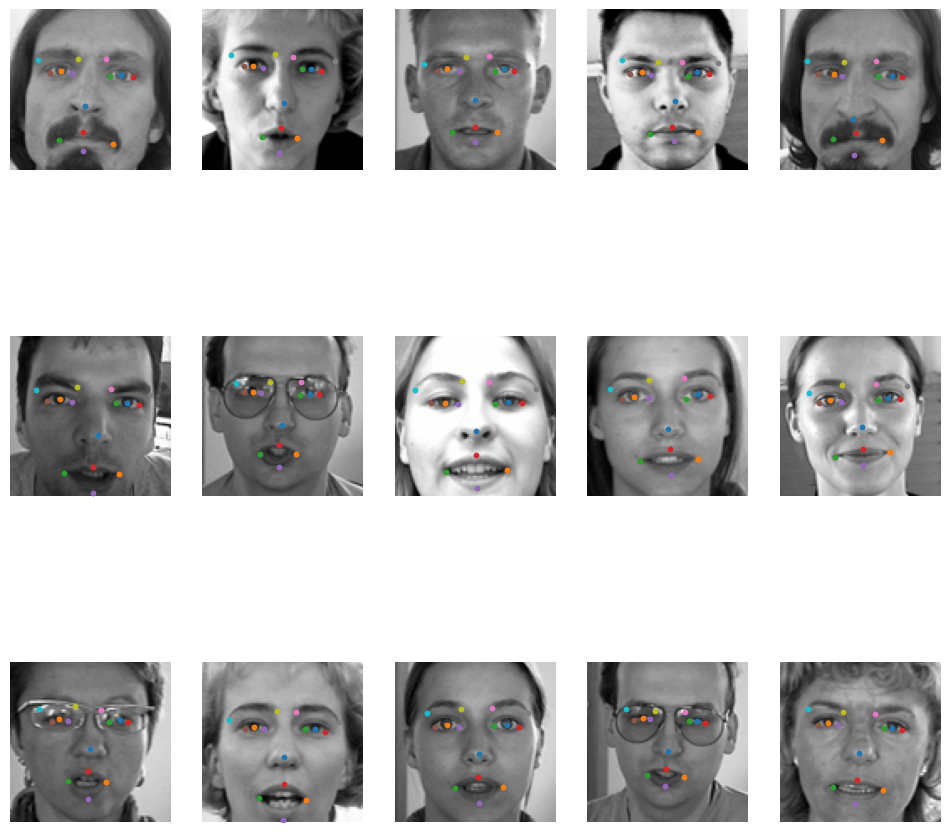

In [ ]:
# These images contains all the 15 facial keypoints
show_images(train_images[:15],y[:15])

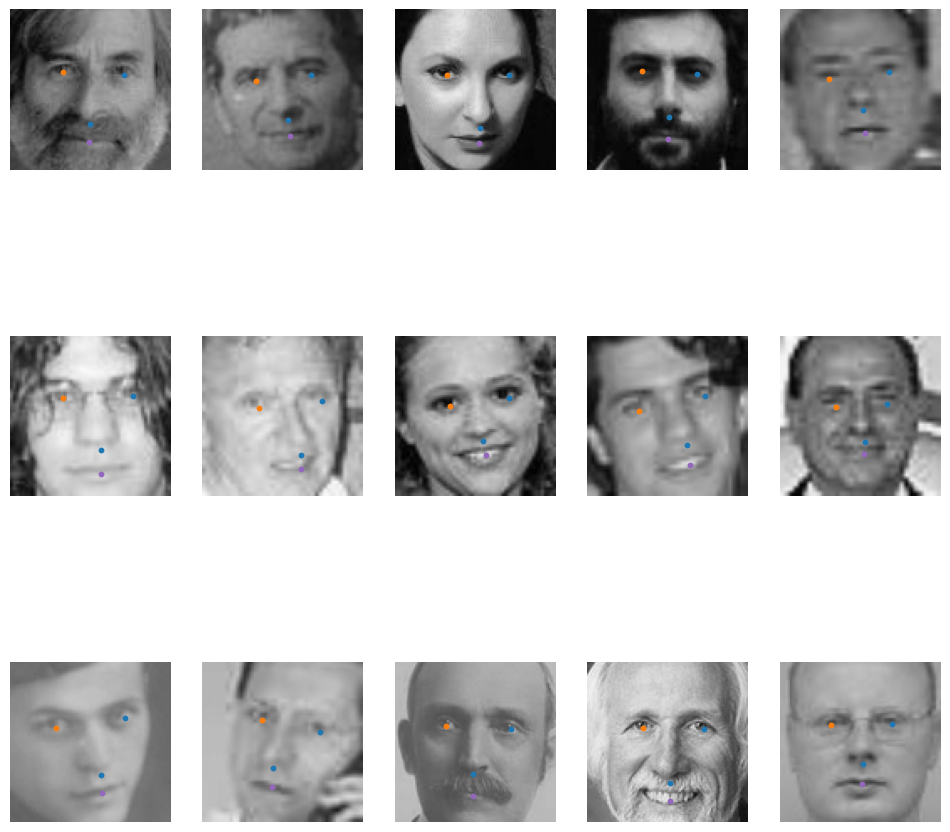

In [ ]:
# These images contains missing facial keypoints
show_images(X[5200:5200+15],y[5200:5200+15])

##  Visualizing a sample from Clean Augmented Data

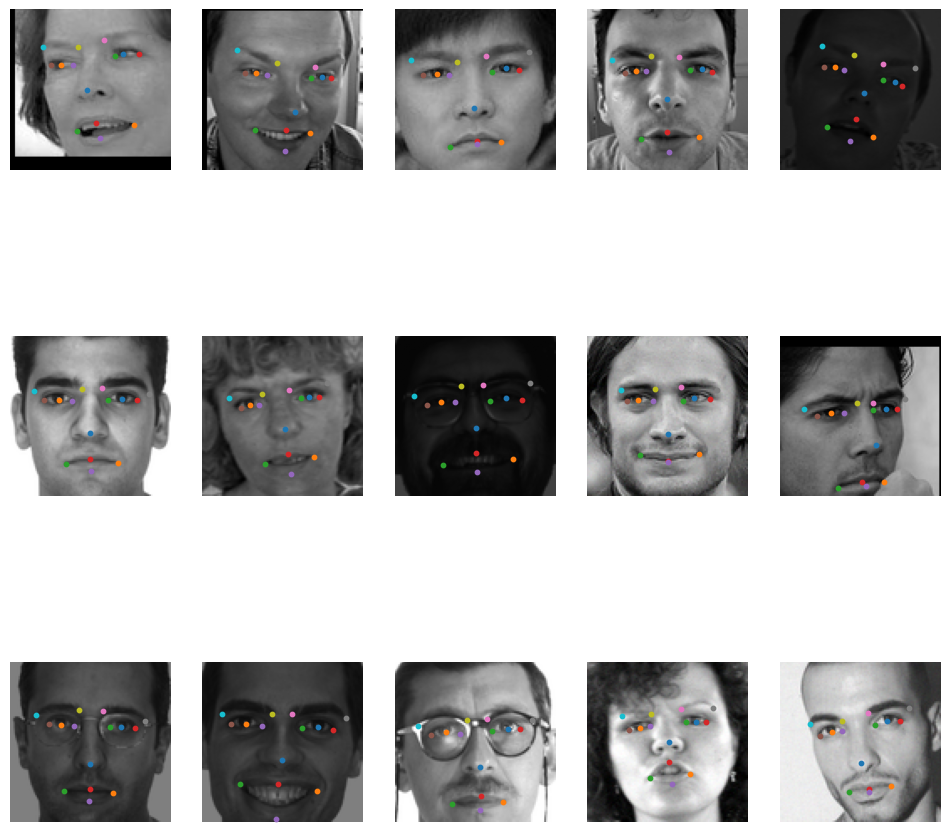

In [ ]:
show_images(X_non_null_augmented[:15],y_non_null_augmented[:15])

# Building & Training the Model

### Defining our Custom Loss Function : RootMeanSquaredError(RMSE)


In [ ]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

### Defining myModel

In [ ]:
model = keras.models.Sequential([
    Conv2D(64,5,padding='same',activation='relu',strides=1,input_shape=(96,96,3)),
    Conv2D(128,3,padding='same',activation='relu',strides=1),
    MaxPooling2D(),
    Conv2D(256,2,padding='same',activation='relu'),
    Conv2D(512,4,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(256,5,padding='same',activation='relu'),
    Conv2D(128,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(300,3,padding='same',activation='relu'),
    Conv2D(400,3,padding='same',activation='relu'),
    Flatten(),
    Dense(90,activation='selu'),
    Dense(190,activation='selu'),
    Dense(490,activation='selu'),
    Dense(30)
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 96, 96, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 48, 48, 512)    │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 256)    │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 300)    │       345,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 400)    │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 90)             │     5,184,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 190)            │        17,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 490)            │        93,590 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │        14,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,615,808 (48.13 MB)

 Trainable params: 12,615,808 (48.13 MB)

 Non-trainable params: 0 (0.00 B)

## Training on Clean Augmented Data

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss=rmse)
history_model = model.fit(train_tf_dataset_non_null,epochs=100,batch_size=64,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min', 
                                                                         baseline=None, restore_best_weights=True),
                                          keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, 
                                                                            min_lr=1e-15, mode='min', verbose=1),
                                          keras.callbacks.ModelCheckpoint('model.keras')],
                                validation_data=val_tf_dataset_non_null)

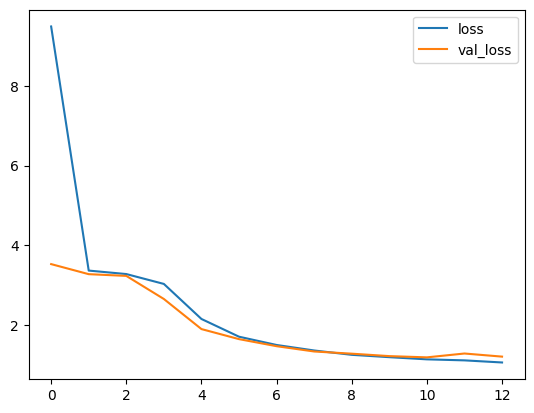

In [ ]:
show_training_validation_loss_curve(history_model)

In [ ]:
history_model = model.fit(train_tf_dataset_non_null,epochs=100,batch_size=64,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', 
                                                                         baseline=None, restore_best_weights=True),
                                          keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, 
                                                                            min_lr=1e-15, mode='min', verbose=1),
                                          keras.callbacks.ModelCheckpoint('model_1.keras')],
                                validation_data=val_tf_dataset_non_null)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 1.0714 - val_loss: 1.1142 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.9813 - val_loss: 1.1640 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.9853 - val_loss: 1.3163 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 1.0110 - val_loss: 1.1329 - learning_rate: 0.0010
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.9688 - val_loss: 1.0930 - learning_rate: 0.0010
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.9342 - val_loss: 1.0683 - learning_rate: 0.0010
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.9516 - val_loss: 1.2565 - learning_rate: 0.0010
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.9214 - val_loss: 1.0779 - learning_rate: 0.0010
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 33s 176ms/step - loss: 0.8858 - val_loss: 1.168

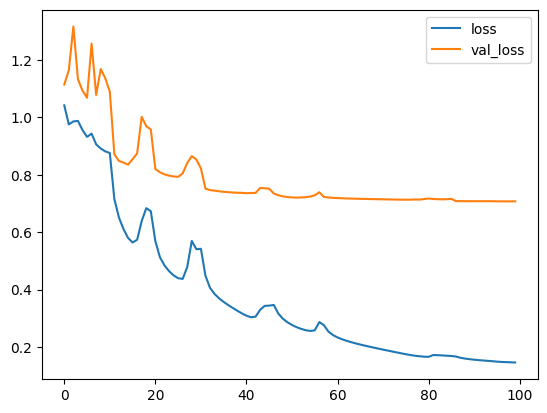

In [ ]:
show_training_validation_loss_curve(history_model)

With this trained model, Lets predict the all 15 points of all 7049 training images i.e. X

In [ ]:
y_pred_X = model.predict(X)

## Visualizing the predictions *y_pred_X*

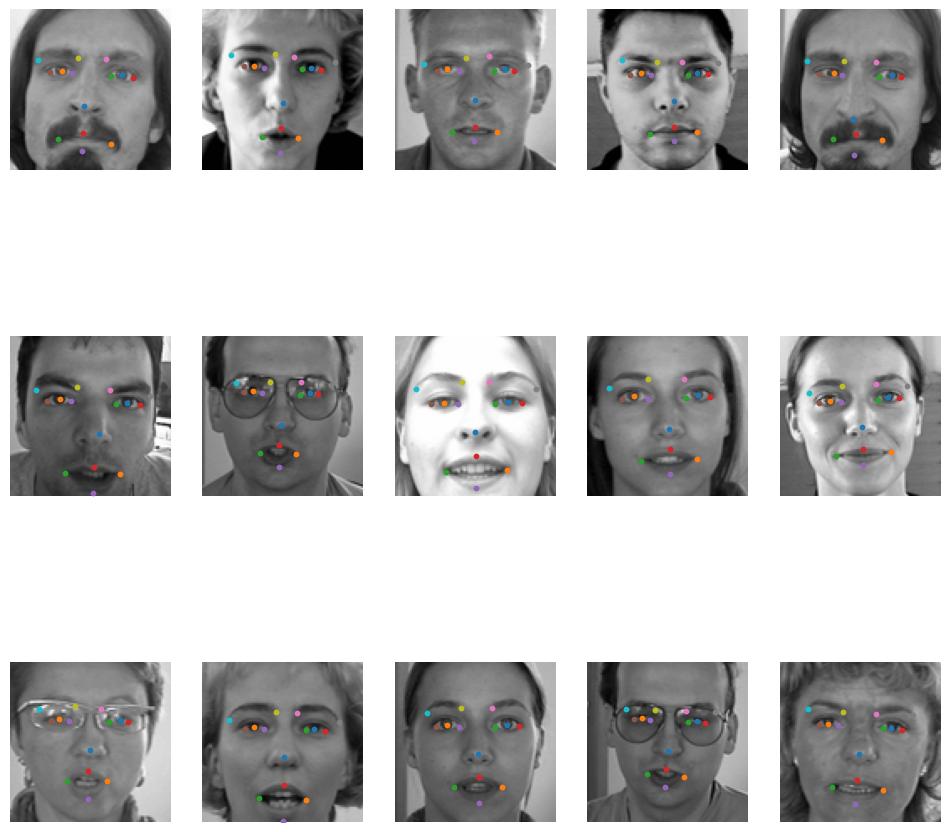

In [ ]:
show_images(X[:15],y_pred_X[:15])

## Preparing the original label **y** data
Lets extract the original points including null and non-null 15 points for all 7049 images and store it in *y*

In [ ]:
def preprocess_y(dataframe_without_image):
    y=[]
    for i in range(len(dataframe_without_image)):
        _ = dataframe_without_image.iloc[i,:].values
        y.append(_)
    y=np.array(y)
    return y

In [ ]:
y = preprocess_y(train.iloc[:,:-1])# Dropping the Image column
print(y.shape)

(7049, 30)


With the predictions *y_pred_X*, I will fill the null values only in original labels *y* and will use non-null values as it is and store it new variable *y_*

In [ ]:
y_ = np.ones((7049,30))
for i in range(7049):
    for j in range(30):
        y_[i,j] = y_pred_X[i,j] if np.isnan(y[i,j]) else y[i,j]

## Augmenting & Splitting the dataset into Training & Validation Dataset

Lets again augment new images from our full dataset of 7049 images

In [ ]:
generator = CustomGenerator() # Try only if you have 15GB+ RAM
X_full_augmented, y_full_augmented = generator.generate(X,y_) # Try only if you have 15GB+ RAM
print('Full Augmented Data Shape', X_full_augmented.shape,y_full_augmented.shape)

# Loading generated data
# X_full_augmented,y_full_augmented = np.load('/kaggle/input/training-and-validation-augmented-data-7x/Training_Validation_data_7x/Full_augmented_data/X_result/X_result.npy'),np.load('/kaggle/input/training-and-validation-augmented-data-7x/Training_Validation_data_7x/Full_augmented_data/y_result.npy')
# print('Full Augmented Data Shape', X_full_augmented.shape,y_full_augmented.shape)
#Around 11GB Data after augmentation

# Train_Test_Split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train,y_valid=train_test_split(X_full_augmented, y_full_augmented,test_size=0.2,random_state=29,shuffle=True)

del X_full_augmented,y_full_augmented # Clearing the RAM to avoid kernel restart

print('Full Augmented Training Data Shape',X_train.shape,y_train.shape)
print('Full Augmented Validation Data Shape',X_valid.shape,y_valid.shape)

Full Augmented Data Shape (49343, 96, 96, 3) (49343, 30)
Full Augmented Training Data Shape (39474, 96, 96, 3) (39474, 30)
Full Augmented Validation Data Shape (9869, 96, 96, 3) (9869, 30)


## Visualizing a sample from the Full Augmented images

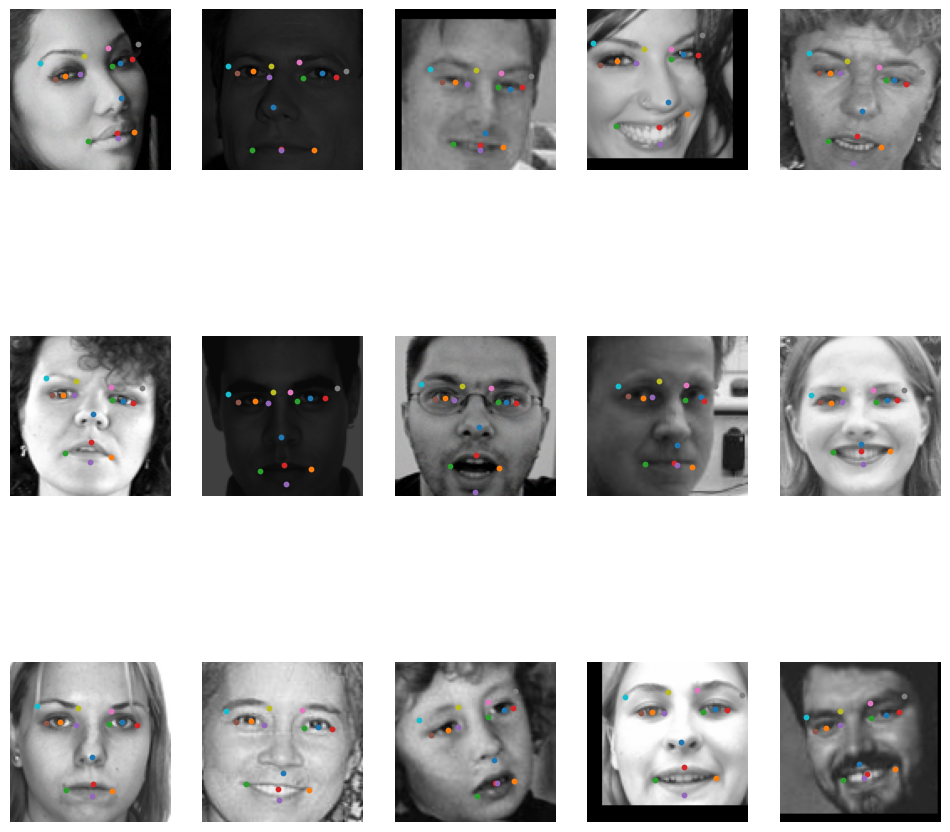

In [ ]:
show_images(X_full_augmented[:15],y_full_augmented[:15])

## Training on Full Augmented Data
Now, Lets train our model on this augmented data

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss=rmse)
history_model = model.fit(X_train,y_train,epochs=10,batch_size=64,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', 
                                                                         baseline=None, restore_best_weights=True),
                                          keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, 
                                                                            min_lr=1e-15, mode='min', verbose=1),
                                          keras.callbacks.ModelCheckpoint('/kaggle/working/model_on_full_augmented_data.keras'),],
                                validation_data=(X_valid,y_valid))

Epoch 1/10
  1/617 ━━━━━━━━━━━━━━━━━━━━ 6:37:25 39s/step - loss: 1.5185

I0000 00:00:1712249682.256720     341 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


617/617 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - loss: 2.6977 - val_loss: 2.3401 - learning_rate: 0.0010
Epoch 2/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 2.0659 - val_loss: 1.7246 - learning_rate: 0.0010
Epoch 3/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 1.8834 - val_loss: 1.9774 - learning_rate: 0.0010
Epoch 4/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 1.6969 - val_loss: 1.6385 - learning_rate: 0.0010
Epoch 5/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 1.6305 - val_loss: 1.7108 - learning_rate: 0.0010
Epoch 6/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 1.5122 - val_loss: 1.5945 - learning_rate: 0.0010
Epoch 7/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 1.4452 - val_loss: 1.6252 - learning_rate: 0.0010
Epoch 8/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - loss: 1.3652 - val_loss: 1.4490 - learning_rate: 0.0010
Epoch 9/10
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 1.3079 - val_loss: 1.5130 - learnin

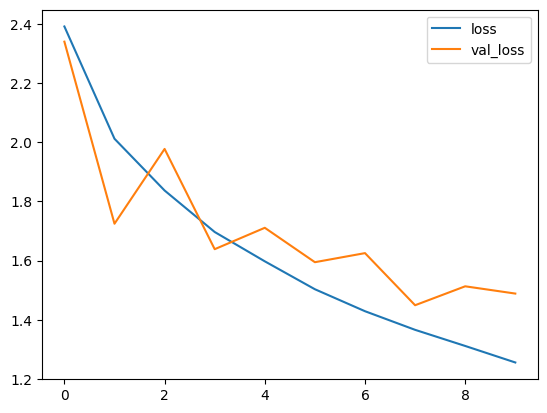

In [ ]:
show_training_validation_loss_curve(history_model)

Further, I trained the model with reduced learning rate

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),loss=rmse)
history_model_3 = model.fit(X_train,y_train,epochs=20,batch_size=64,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', 
                                                                         baseline=None, restore_best_weights=True),
                                          keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, 
                                                                            min_lr=1e-15, mode='min', verbose=1),
                                          keras.callbacks.ModelCheckpoint('/kaggle/working/model_on_full_augmented_data_2.keras'),],
                                validation_data=(X_valid,y_valid))

Epoch 1/20
  1/617 ━━━━━━━━━━━━━━━━━━━━ 7:14:28 42s/step - loss: 1.1953

I0000 00:00:1712251950.264544     767 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


617/617 ━━━━━━━━━━━━━━━━━━━━ 185s 231ms/step - loss: 0.9162 - val_loss: 1.1401 - learning_rate: 5.0000e-05
Epoch 2/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 0.7868 - val_loss: 1.1228 - learning_rate: 5.0000e-05
Epoch 3/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 0.7470 - val_loss: 1.1118 - learning_rate: 5.0000e-05
Epoch 4/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - loss: 0.7213 - val_loss: 1.1047 - learning_rate: 5.0000e-05
Epoch 5/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 0.6945 - val_loss: 1.0960 - learning_rate: 5.0000e-05
Epoch 6/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 142s 170ms/step - loss: 0.6559 - val_loss: 1.0942 - learning_rate: 5.0000e-05
Epoch 7/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 0.6187 - val_loss: 1.0878 - learning_rate: 5.0000e-05
Epoch 8/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 0.6013 - val_loss: 1.0851 - learning_rate: 5.0000e-05
Epoch 9/20
617/617 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - loss: 0.5

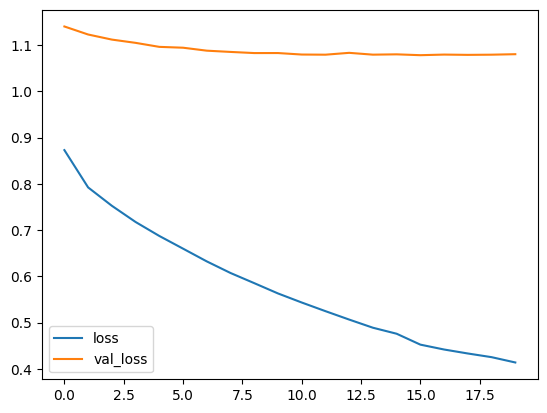

In [ ]:
show_training_validation_loss_curve(history_model_3)

# Transfer Learning

Trying Transfer Learning on MobileNet Model

In [ ]:
mobilenet = keras.applications.MobileNet(include_top=False,input_shape=(96,96,3))
mobilenet.trainable=True
mobilenet_model = keras.models.Sequential([
    mobilenet,
    GlobalAvgPool2D(),
    Dense(100,activation='selu'),
#     Dropout(0.2),
    Dense(30)
])
mobilenet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss=rmse)
history_mobilenet = mobilenet_model.fit(X_train,y_train,epochs=100,batch_size=64,
                                callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', 
                                                                         baseline=None, restore_best_weights=True),
                                          keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, 
                                                                            min_lr=1e-15, mode='min', verbose=1),
                                          keras.callbacks.ModelCheckpoint('/kaggle/working/mobilenet_model.keras'),
                                          ],
                                validation_data=(X_valid,y_valid))

/tmp/ipykernel_1246/1038753278.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = keras.applications.MobileNet(include_top=False,input_shape=(96,96,3))


Epoch 1/100
  5/617 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 50.2495 

I0000 00:00:1712338295.949706    1288 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


617/617 ━━━━━━━━━━━━━━━━━━━━ 72s 70ms/step - loss: 8.9590 - val_loss: 2.0146 - learning_rate: 0.0010
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.7943 - val_loss: 3.2643 - learning_rate: 0.0010
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.6212 - val_loss: 1.6972 - learning_rate: 0.0010
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.5098 - val_loss: 1.8516 - learning_rate: 0.0010
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.4269 - val_loss: 1.6419 - learning_rate: 0.0010
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.3559 - val_loss: 2.2388 - learning_rate: 0.0010
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.3252 - val_loss: 1.7227 - learning_rate: 0.0010
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.2553
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
617/617 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - loss: 1.2553 - val_loss: 1.9730

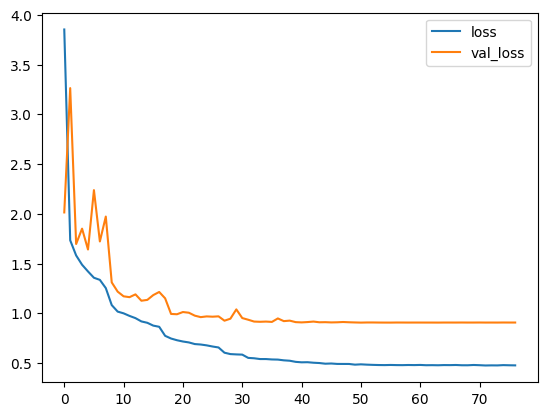

In [ ]:
show_training_validation_loss_curve(history_mobilenet)

# Submission

## Loading Test Dataset

In [ ]:
test = pd.read_csv('/kaggle/input/facial-keypoints-detection/test.zip')
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


### Extracting Test Images
As the images are in 'Image' column of dataset as object dtype, We need to convert these to Numpy array as done previously with training dataset by using the same ***extract_images*** function. After getting the numpy array, we are also Standardizing the images to have all pixels between 0 and 1

In [ ]:
test_images = extract_images(test)
print(test_images.shape)

(1783, 96, 96)


In [ ]:
X_test = preprocess_X(test_images)
sample_submission = pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')
feature_names = list(sample_submission['FeatureName'])
image_ids = list(sample_submission['ImageId']-1)
row_ids = list(sample_submission['RowId'])
row_ids = pd.Series(row_ids, name = 'RowId')
feature_list = []
for feature in feature_names:
    feature_list.append(feature_names.index(feature))

#Getting Predictions
y_preds = model.predict(X_test)
predictions = []
for x,y in zip(image_ids,feature_list):
    predictions.append(y_preds[x][y])
locations = pd.Series(predictions, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result.to_csv('submission_result_model_after_full_augmented_data.csv',index = False)

# Visualizing Predicted Landmarks 

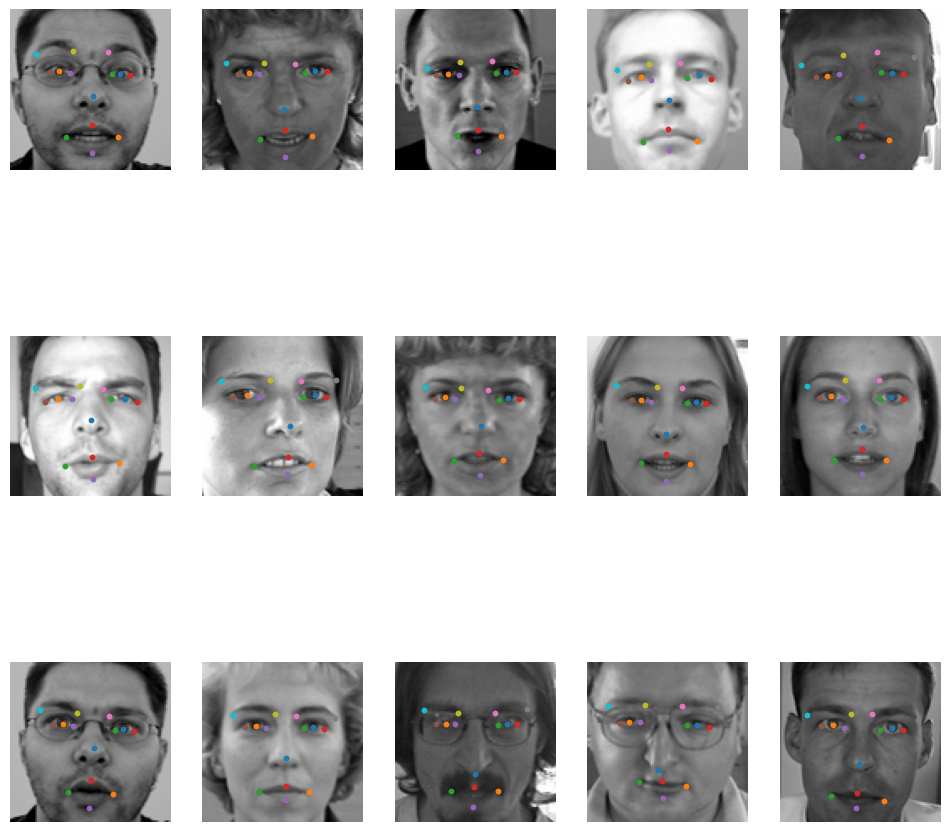

In [ ]:
show_images(X_test[:15],y_preds[:15])